<a href="https://colab.research.google.com/github/sjbaek12/sjbaek12.github.io/blob/master/%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

In [29]:
from google.colab import files
uploaded = files.upload()

Saving data.xls to data (1).xls


In [96]:
xlsx = pd.read_excel(r'data.xls')

In [50]:
type(xlsx)
print(len(xlsx))

856


In [97]:
xlsx.tail()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
851,2017/01/06,"1,810,000","32,000","177,619","321,737,489,344","1,809,000","1,822,000","1,802,000","254,629,600","140,679,337"
852,2017/01/05,"1,778,000","-30,000","219,349","392,320,929,368","1,803,000","1,803,000","1,777,000","250,127,861","140,679,337"
853,2017/01/04,"1,808,000","-16,000","159,435","289,084,849,500","1,825,000","1,826,000","1,805,000","254,348,241","140,679,337"
854,2017/01/03,"1,824,000","19,000","147,153","267,688,372,000","1,814,000","1,831,000","1,801,000","256,599,111","140,679,337"
855,2017/01/02,"1,805,000","3,000","93,012","167,931,825,000","1,799,000","1,812,000","1,794,000","253,926,203","140,679,337"


In [98]:
xlsx.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2020/06/30,"52,800",400,"21,157,172","1,129,431,038,800","53,900","53,900","52,800","315,204,519","5,969,782,550"
1,2020/06/29,"52,400",-900,"17,776,925","934,880,364,880","52,500","53,200","52,000","312,816,606","5,969,782,550"
2,2020/06/26,"53,300","1,400","21,575,360","1,146,335,751,523","52,800","53,900","52,200","318,189,410","5,969,782,550"
3,2020/06/25,"51,900","-1,000","18,541,624","970,494,909,540","52,100","53,000","51,900","309,831,714","5,969,782,550"
4,2020/06/24,"52,900","1,500","24,519,552","1,301,305,533,100","51,900","53,900","51,600","315,801,497","5,969,782,550"


In [99]:
xlsx = xlsx.rename(columns={"년/월/일" : "day", "종가":"close", "대비":"dif", "거래량(주)":"volume", "시가":"start", "고가":"high", "저가":"low"})

In [100]:
del xlsx["거래대금(원)"]
del xlsx["시가총액(백만)"]
del xlsx["상장주식수(주)"]

In [88]:
from datetime import datetime

In [56]:
xlsx.loc[0, "day"]

'2020/06/30'

In [57]:
strpDateTime = datetime.strptime("2020/06/30", "%Y/%m/%d")


In [42]:
type(strpDateTime)

datetime.datetime

In [60]:
print(strpDateTime)

2020-06-30 00:00:00


In [101]:
for i in range(0, len(xlsx)):
  xlsx.loc[i, 'day'] = datetime.strptime(xlsx.loc[i,'day'], "%Y/%m/%d")


In [102]:
xlsx

,day,close,dif,volume,start,high,low
0,2020-06-30 00:00:00,"52,800",400,"21,157,172","53,900","53,900","52,800"
1,2020-06-29 00:00:00,"52,400",-900,"17,776,925","52,500","53,200","52,000"
2,2020-06-26 00:00:00,"53,300","1,400","21,575,360","52,800","53,900","52,200"
3,2020-06-25 00:00:00,"51,900","-1,000","18,541,624","52,100","53,000","51,900"
4,2020-06-24 00:00:00,"52,900","1,500","24,519,552","51,900","53,900","51,600"
...,...,...,...,...,...,...,...
851,2017-01-06 00:00:00,"1,810,000","32,000","177,619","1,809,000","1,822,000","1,802,000"
852,2017-01-05 00:00:00,"1,778,000","-30,000","219,349","1,803,000","1,803,000","1,777,000"
853,2017-01-04 00:00:00,"1,808,000","-16,000","159,435","1,825,000","1,826,000","1,805,000"
854,2017-01-03 00:00:00,"1,824,000","19,000","147,153","1,814,000","1,831,000","1,801,000"


In [103]:
sprice = xlsx[:511] # 2018년 6월1일부터 시작된 데이터만 사용

In [104]:
sprice_s = sprice[::-1] #데이터를 시간순서로 정렬

In [93]:
sprice_s.head()

,day,close,dif,volume,start,high,low
510,2018-06-01 00:00:00,"51,300",600,"13,038,499","50,500","51,700","49,950"
509,2018-06-04 00:00:00,"51,100",-200,"9,767,171","50,800","51,200","50,700"
508,2018-06-05 00:00:00,"51,300",200,"9,144,100","51,100","51,400","50,400"
507,2018-06-07 00:00:00,"50,600",-700,"13,590,016","51,800","51,800","50,500"
506,2018-06-08 00:00:00,"49,650",-950,"16,951,706","50,200","50,400","49,600"


In [94]:
import numpy as np

In [105]:
float(sprice_s.loc[0, 'close'].replace(",", ''))

52800.0

In [106]:
for i in range(0, len(sprice_s)):
  sprice_s.loc[i, 'close'] = float(sprice_s.loc[i, 'close'].replace(",", ''))
  sprice_s.loc[i, 'dif'] = float(sprice_s.loc[i, 'dif'].replace(",", ''))
  sprice_s.loc[i, 'volume'] = float(sprice_s.loc[i, 'volume'].replace(",", ''))
  sprice_s.loc[i, 'start'] = float(sprice_s.loc[i, 'start'].replace(",", ''))
  sprice_s.loc[i, 'high'] = float(sprice_s.loc[i, 'high'].replace(",", ''))
  sprice_s.loc[i, 'low'] = float(sprice_s.loc[i, 'low'].replace(",", ''))
 

In [107]:
sprice_s

,day,close,dif,volume,start,high,low
510,2018-06-01 00:00:00,51300,600,1.30385e+07,50500,51700,49950
509,2018-06-04 00:00:00,51100,-200,9.76717e+06,50800,51200,50700
508,2018-06-05 00:00:00,51300,200,9.1441e+06,51100,51400,50400
507,2018-06-07 00:00:00,50600,-700,1.359e+07,51800,51800,50500
506,2018-06-08 00:00:00,49650,-950,1.69517e+07,50200,50400,49600
...,...,...,...,...,...,...,...
4,2020-06-24 00:00:00,52900,1500,2.45196e+07,51900,53900,51600
3,2020-06-25 00:00:00,51900,-1000,1.85416e+07,52100,53000,51900
2,2020-06-26 00:00:00,53300,1400,2.15754e+07,52800,53900,52200
1,2020-06-29 00:00:00,52400,-900,1.77769e+07,52500,53200,52000


In [109]:
sprice_s.to_csv('new_file.txt')
files.download('new_file.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
uploaded = files.upload()

Saving new_file.txt to new_file (1).txt


In [112]:
data = pd.read_csv('new_file.txt')

In [113]:
data

,Unnamed: 0,day,close,dif,volume,start,high,low
0,510,2018-06-01 00:00:00,51300.0,600.0,13038499.0,50500.0,51700.0,49950.0
1,509,2018-06-04 00:00:00,51100.0,-200.0,9767171.0,50800.0,51200.0,50700.0
2,508,2018-06-05 00:00:00,51300.0,200.0,9144100.0,51100.0,51400.0,50400.0
3,507,2018-06-07 00:00:00,50600.0,-700.0,13590016.0,51800.0,51800.0,50500.0
4,506,2018-06-08 00:00:00,49650.0,-950.0,16951706.0,50200.0,50400.0,49600.0
...,...,...,...,...,...,...,...,...
506,4,2020-06-24 00:00:00,52900.0,1500.0,24519552.0,51900.0,53900.0,51600.0
507,3,2020-06-25 00:00:00,51900.0,-1000.0,18541624.0,52100.0,53000.0,51900.0
508,2,2020-06-26 00:00:00,53300.0,1400.0,21575360.0,52800.0,53900.0,52200.0
509,1,2020-06-29 00:00:00,52400.0,-900.0,17776925.0,52500.0,53200.0,52000.0


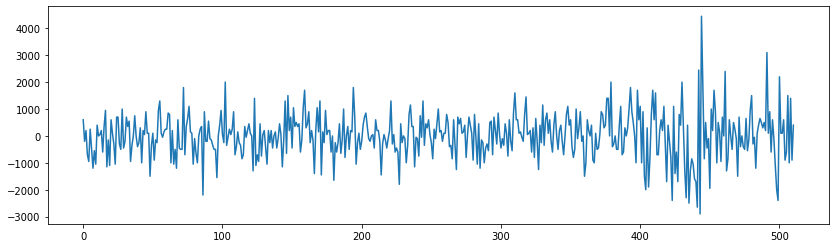

In [126]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.plot(data['dif'])
plt.show()

In [123]:
y_data = data.loc[1:501, 'dif']  # y는 종가의 차이로 전날에 영향을 받는다고 가정한다

In [155]:
data.loc[401,:] # y_data의 validation 기준일은 20년 1월 21이고 종가는 61400원이고 전날 대비 1000원 하락했다.

Unnamed: 0                    109
day           2020-01-21 00:00:00
close                       61400
dif                         -1000
volume                1.11427e+07
start                       62000
high                        62400
low                         61200
Name: 401, dtype: object

In [124]:
x_data = data.loc[0:500, ['close', 'volume', 'start', 'high', 'low']]

In [128]:
x_data  = np.asarray(x_data, dtype=float)

In [129]:
y_data  = np.asarray(y_data, dtype=float)

In [130]:
print(x_data.shape, y_data.shape)

(501, 5) (501,)


In [131]:
x_train = x_data[0:400]
x_val = x_data[400:500]
print(x_train.shape, x_val.shape)

(400, 5) (100, 5)


In [134]:
y_train = y_data[0:400]
y_val = y_data[400:500]

In [156]:
y_val[0]

-1000.0

In [139]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train-mean)/std

x_val = (x_val-mean)/std

In [141]:
x_train[0:5]

array([[ 1.2268386 ,  0.49281082,  1.03245529,  1.21973112,  1.01758591],
       [ 1.17788744, -0.31375125,  1.10571587,  1.09754112,  1.20267445],
       [ 1.2268386 , -0.46737248,  1.17897645,  1.14641712,  1.12863903],
       [ 1.05550952,  0.62879006,  1.34991781,  1.24416912,  1.1533175 ],
       [ 0.82299148,  1.45763133,  0.95919471,  0.90203712,  0.93121126]])

In [142]:
x_train = x_train.reshape(-1,1,5) 
x_val = x_val.reshape(-1,1,5) # LSTM으로 들어가기 위해서 자료의 형태를 맞추어 준다. (샘플수, 타입스텝 수, 각 타입스텝의 특성수 )

In [143]:
x_train[0:5]

array([[[ 1.2268386 ,  0.49281082,  1.03245529,  1.21973112,
          1.01758591]],

       [[ 1.17788744, -0.31375125,  1.10571587,  1.09754112,
          1.20267445]],

       [[ 1.2268386 , -0.46737248,  1.17897645,  1.14641712,
          1.12863903]],

       [[ 1.05550952,  0.62879006,  1.34991781,  1.24416912,
          1.1533175 ]],

       [[ 0.82299148,  1.45763133,  0.95919471,  0.90203712,
          0.93121126]]])

In [144]:
print(x_train.shape)

(400, 1, 5)


In [145]:
from keras.layers import LSTM, Dense
from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras import Input

Using TensorFlow backend.


In [146]:
model = Sequential()
model.add(LSTM(60, input_shape=(1,5)))  # input_shape는 타임스텝수, 특성의 수
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60)                15840     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 15,901
Trainable params: 15,901
Non-trainable params: 0
_________________________________________________________________


In [147]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=500, verbose=0)

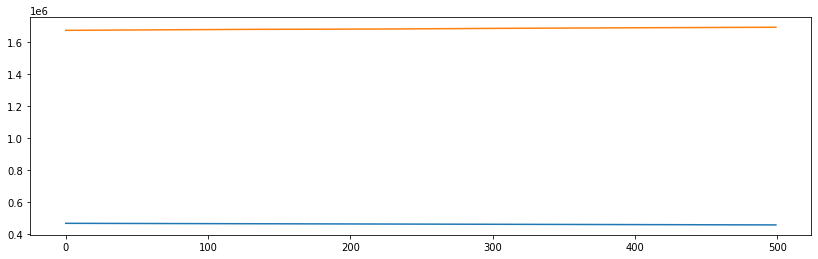

In [148]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.show()

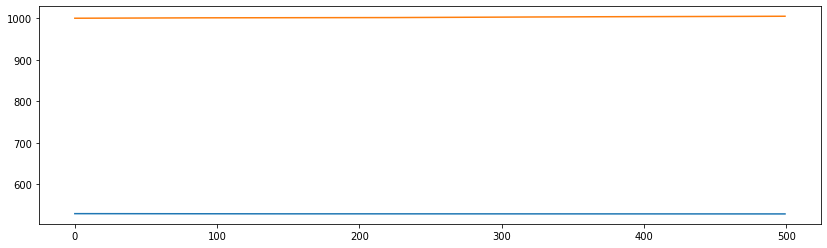

In [149]:
plt.plot(history.history['mae']) 
plt.plot(history.history['val_mae'])
plt.show()

In [150]:
y_hat = model.predict(x_val)

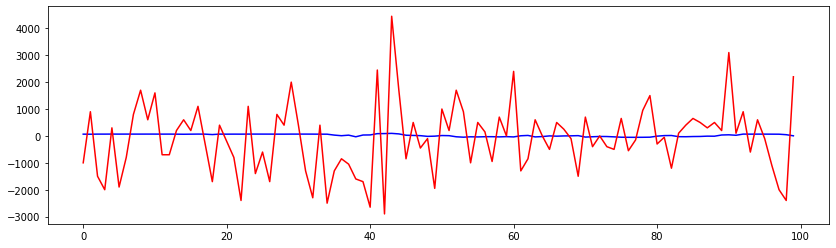

In [151]:
plt.plot(y_hat, 'b') 
plt.plot(y_val, 'r')
plt.show()

In [157]:
data.loc[400,:] 20년 1월20일 종가는 62400원이었다

Unnamed: 0                    110
day           2020-01-20 00:00:00
close                       62400
dif                          1100
volume                1.25289e+07
start                       62000
high                        62800
low                         61700
Name: 400, dtype: object

In [158]:
price_hats = []
price_start = 62400.0

for i in range(0, len(y_hat)):
  price_start = price_start + y_hat[i]
  price_hats.append(price_start)


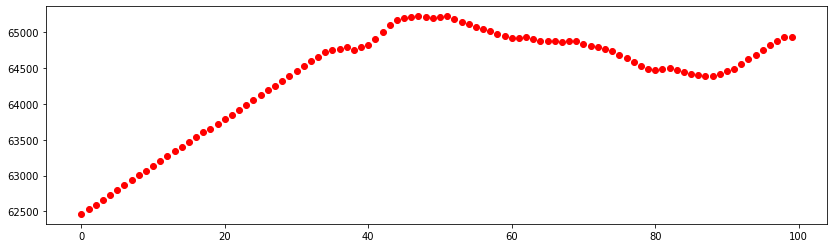

In [173]:
plt.plot(price_hats, 'ro')
plt.show()

In [175]:
 data.loc[401:500,['day','close']] # 20년 1월21일 부터 시작하여 100일간 종가 필요

,day,close
401,2020-01-21 00:00:00,61400.0
402,2020-01-22 00:00:00,62300.0
403,2020-01-23 00:00:00,60800.0
404,2020-01-28 00:00:00,58800.0
405,2020-01-29 00:00:00,59100.0
...,...,...
496,2020-06-10 00:00:00,55400.0
497,2020-06-11 00:00:00,54300.0
498,2020-06-12 00:00:00,52300.0
499,2020-06-15 00:00:00,49900.0


In [183]:
price_real = data.loc[401:500, 'close']
price_real = np.asarray(price_real, dtype=float)

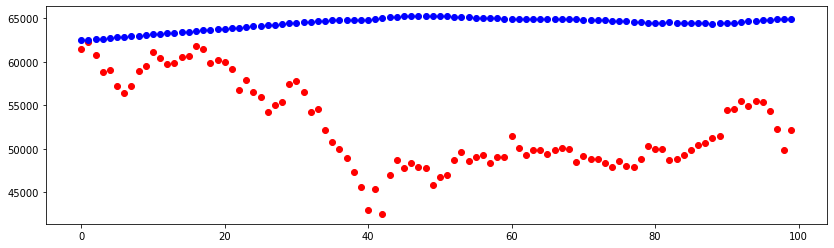

In [185]:
plt.plot(price_real, 'ro')
plt.plot(price_hats, 'bo')
plt.show()